<a class="anchor" id="import">

## 1. Import 
    
</a>

<a class="anchor" id="libraries">

## 1.1 Import libraries
    
</a>

In [168]:
import sqlite3
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product
from scipy.stats import skewnorm

from datetime import datetime
from sklearn.impute import KNNImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.decomposition import PCA
from collections import Counter
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering



# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

# Display all the df and results
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  
pd.set_option('display.colheader_justify', 'center')  

In [86]:
#! pip install graphviz

<a class="anchor" id="dataset">

## 1.2 Import the dataset
    
</a>

In [169]:
# Read the CSV file
df = pd.read_csv("data_beforeclusterig.csv")

In [170]:
df_backup=df

In [171]:
df=df.set_index("customer_id")

In [172]:
df.head()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),age_group,Sum_of_Orders,recency,active_period,frequency,total_spend,cuisine_diversity,customer_city,Weekdays,Weekends,Main Courses,Snacks and Street Food,Desserts and Beverages,Healthy and Special Diets,enc_payment_method_CARD,enc_payment_method_CASH,enc_payment_method_DIGI,enc_is_chain_0,enc_is_chain_1,enc_customer_city_2,enc_customer_city_4,enc_customer_city_8,enc_age_group,enc_last_promo
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,-1.338050,-0.399572,-0.069431,1,-1.183266,-2.691007,DELIVERY,DIGI,-0.436462,-0.464162,-0.285297,-0.143166,-0.244386,-0.236288,-0.186047,-0.173833,4.038654,-0.3127,-0.330489,-0.177102,-0.327942,-0.266515,-0.194024,0.496912,-0.567359,-0.585044,-0.600057,-0.644372,-0.628135,0.293126,-0.166196,-0.173983,-0.1876,-0.24087,-0.238856,-0.227738,-0.211093,-0.219166,-0.261504,-0.332740,-0.391635,-0.418192,-0.387664,-0.375187,-0.367683,-0.392931,-0.417112,-0.42601,2.010814,-0.328968,-0.268484,-0.20898,-0.171644,-0.166682,-0.390814,-0.593880,-0.698477,0.663266,Teenagers (15-19),-0.498308,2.691007,-1.160188,1.557000,-0.194602,-0.860516,2,0,0.488075,0.144187,-0.340593,-0.328655,-0.173833,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5d272b9dcb,-1.479296,-0.399572,-0.583074,1,-1.183266,-2.691007,DISCOUNT,DIGI,0.745882,-0.151007,-0.285297,-0.143166,-0.244386,-0.236288,-0.186047,-0.173833,-0.232730,-0.3127,-0.330489,-0.177102,-0.327942,-0.266515,-0.194024,0.496912,-0.567359,-0.585044,-0.600057,-0.644372,-0.628135,0.293126,-0.166196,-0.173983,-0.1876,-0.24087,-0.238856,-0.227738,-0.211093,-0.219166,-0.261504,-0.332740,0.860332,0.737900,-0.387664,-0.375187,-0.367683,-0.392931,-0.417112,-0.42601,-0.391899,-0.328968,-0.268484,-0.20898,-0.171644,-0.166682,-0.390814,0.431970,-0.698477,-0.497101,Teenagers (15-19),-0.498308,2.691007,-1.160188,1.557000,-0.442515,-0.177250,8,0,0.488075,-0.180168,-0.340593,-0.328655,-0.173833,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
f6d1b2ba63,1.486865,-0.780775,-0.583074,1,-1.183266,-2.691007,DISCOUNT,CASH,0.412022,-0.464162,-0.285297,-0.143166,-0.244386,-0.236288,-0.186047,-0.173833,-0.232730,-0.3127,-0.330489,-0.177102,-0.327942,-0.266515,-0.194024,0.496912,-0.567359,-0.585044,-0.600057,-0.644372,-0.628135,0.293126,-0.166196,-0.173983,-0.1876,-0.24087,-0.238856,-0.227738,-0.211093,-0.219166,-0.261504,1.162867,-0.391635,0.737900,-0.387664,-0.375187,-0.367683,-0.392931,-0.417112,-0.42601,-0.391899,-0.328968,-0.268484,-0.20898,-0.171644,-0.166682,-0.390814,0.431970,-0.698477,-0.497101,Adults (30-49),-0.498308,2.691007,-1.160188,1.557000,-0.699144,-0.860516,4,0,0.488075,-0.515927,-0.340593,-0.328655,-0.173833,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0
180c632ed8,-0.208084,-0.399572,-0.411860,1,-1.183266,-2.647970,DELIVERY,DIGI,-0.436462,0.207234,-0.285297,-0.143166,-0.244386,-0.236288,-0.186047,-0.173833,2.408784,-0.3127,-0.330489,-0.177102,-0.327942,-0.266515,-0.194024,-0.565458,0.480419,-0.585044,-0.600057,-0.644372,-0.628135,0.293126,-0.166196,-0.173983,-0.1876,-0.24087,-0.238856,-0.227738,-0.211093,-0.219166,-0.261504,-0.332740,-0.391635,0.737900,-0.387664,-0.375187,1.397283,-0.392931,-0.417112,-0.42601,-0.391899,-0.328968,-0.268484,-0.20898,-0.171644,-0.166682,-0.390814,-0.080955,-0.295483,-0.497101,Young Adults (20-29),-0.498308,2.647970,-1.126053,0.754685,-0.125894,-0.177250,4,1,-0.131474,0.234080,-0.340593,-0.328655,-0.173833,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4eb37a6705,-1.055558

<a class="anchor" id="clustering">

# 2. Clustering
    
</a>

In [173]:
df.columns.values

array(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14',
       'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21',
       'HR_22', 'HR_23', 'early_morning(0h-5h)', 'morning(6h-11h)',
       'afternoon(12h-17h)', 'night(18h-23h)', 'age_group',
       'Sum_of_Orders', 'recency', 'active_period', 'frequency',
       'total_spend', 'cuisine_diversity', 'customer_city', 'Weekdays',
       'Weekends', 'Main Courses

In [174]:
# Splitting feature names into groups
metric_features = ['customer_age', 'vendor_count', 'product_count','first_order', 'last_order',
                   'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe','CUI_Chicken Dishes', 
                   'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy','CUI_Indian', 'CUI_Italian', 
                   'CUI_Japanese', 'CUI_Noodle Dishes','CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai',
                   'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                   'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7','HR_8', 'HR_9', 
                   'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14','HR_15', 'HR_16', 'HR_17', 'HR_18', 
                   'HR_19', 'HR_20', 'HR_21','HR_22', 'HR_23', 'early_morning(0h-5h)', 'morning(6h-11h)',
                   'afternoon(12h-17h)', 'night(18h-23h)',
                   'Sum_of_Orders', 'recency', 'active_period', 'frequency','total_spend', 'cuisine_diversity',
                   'Weekdays','Weekends', 
                   'Main Courses','Snacks and Street Food', 'Desserts and Beverages','Healthy and Special Diets']

non_metric_features = df.columns[df.columns.str.startswith('enc_')].tolist() 
unused_features = [i for i in df.columns if i not in (metric_features+non_metric_features) ]

# Select variables according to their correlations
# Updating metric_features
metric_features.remove('vendor_count')
metric_features.remove('product_count')

# Display
print('metric_features:', metric_features)
print('\nnon_metric_features:', non_metric_features)
print('\nunused_features:', unused_features)

metric_features: ['customer_age', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'early_morning(0h-5h)', 'morning(6h-11h)', 'afternoon(12h-17h)', 'night(18h-23h)', 'Sum_of_Orders', 'recency', 'active_period', 'frequency', 'total_spend', 'cuisine_diversity', 'Weekdays', 'Weekends', 'Main Courses', 'Snacks and Street Food', 'Desserts and Beverages', 'Healthy and Special Diets']

non_metric_features: ['enc_payment_method_CARD', 'enc_payment_method_CASH', 'enc_payment_method_DIGI', 'enc_i

In [175]:
# List of columns to drop
columns_to_drop = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
                   'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 
                   'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
                   'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                   'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe','CUI_Chicken Dishes', 
                   'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy','CUI_Indian', 'CUI_Italian', 
                   'CUI_Japanese', 'CUI_Noodle Dishes','CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']

metric_features = [i for i in metric_features if i not in columns_to_drop]

df=df.drop(columns=columns_to_drop)

In [176]:
df.head()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),age_group,Sum_of_Orders,recency,active_period,frequency,total_spend,cuisine_diversity,customer_city,Weekdays,Weekends,Main Courses,Snacks and Street Food,Desserts and Beverages,Healthy and Special Diets,enc_payment_method_CARD,enc_payment_method_CASH,enc_payment_method_DIGI,enc_is_chain_0,enc_is_chain_1,enc_customer_city_2,enc_customer_city_4,enc_customer_city_8,enc_age_group,enc_last_promo
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,-1.338050,-0.399572,-0.069431,1,-1.183266,-2.691007,DELIVERY,DIGI,-0.390814,-0.593880,-0.698477,0.663266,Teenagers (15-19),-0.498308,2.691007,-1.160188,1.557000,-0.194602,-0.860516,2,0,0.488075,0.144187,-0.340593,-0.328655,-0.173833,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5d272b9dcb,-1.479296,-0.399572,-0.583074,1,-1.183266,-2.691007,DISCOUNT,DIGI,-0.390814,0.431970,-0.698477,-0.497101,Teenagers (15-19),-0.498308,2.691007,-1.160188,1.557000,-0.442515,-0.177250,8,0,0.488075,-0.180168,-0.340593,-0.328655,-0.173833,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
f6d1b2ba63,1.486865,-0.780775,-0.583074,1,-1.183266,-2.691007,DISCOUNT,CASH,-0.390814,0.431970,-0.698477,-0.497101,Adults (30-49),-0.498308,2.691007,-1.160188,1.557000,-0.699144,-0.860516,4,0,0.488075,-0.515927,-0.340593,-0.328655,-0.173833,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0
180c632ed8,-0.208084,-0.399572,-0.411860,1,-1.183266,-2.647970,DELIVERY,DIGI,-0.390814,-0.080955,-0.295483,-0.497101,Young Adults (20-29),-0.498308,2.647970,-1.126053,0.754685,-0.125894,-0.177250,4,1,-0.131474,0.234080,-0.340593,-0.328655,-0.173833,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4eb37a6705,-1.055558,-0.399572,-0.069431,0,-1.183266,-2.647970,NO PROMO,DIGI,-0.390814,0.431970,-0.698477,-0.497101,Young Adults (20-29),-0.498308,2.647970,-1.126053,0.754685,0.486325,-0.177250,4,1,-0.131474,1.035072,-0.340593,-0.328655,-0.173833,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## DBSCAN for Outliers

#### Defining eps and min_samples:
- **MinPts**: As a rule of thumb, **minPts = 2 x dim** can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates.

- **ε**: The value for ε can then be chosen by using a **k-distance graph**, plotting the distance to the kth (k = minPts - 1) nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an **"elbow"**: if ε is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster. 

- The assumption is that for points in a cluster, **their k nearest neighbors are at roughly the same distance**. Noise points have their k-th nearest neighbors at farther distance

In [177]:
# Finding dim
dim=len(metric_features)
print(f'dim = {dim}')
print(f'MinPts = {2*dim}')

dim = 19
MinPts = 38


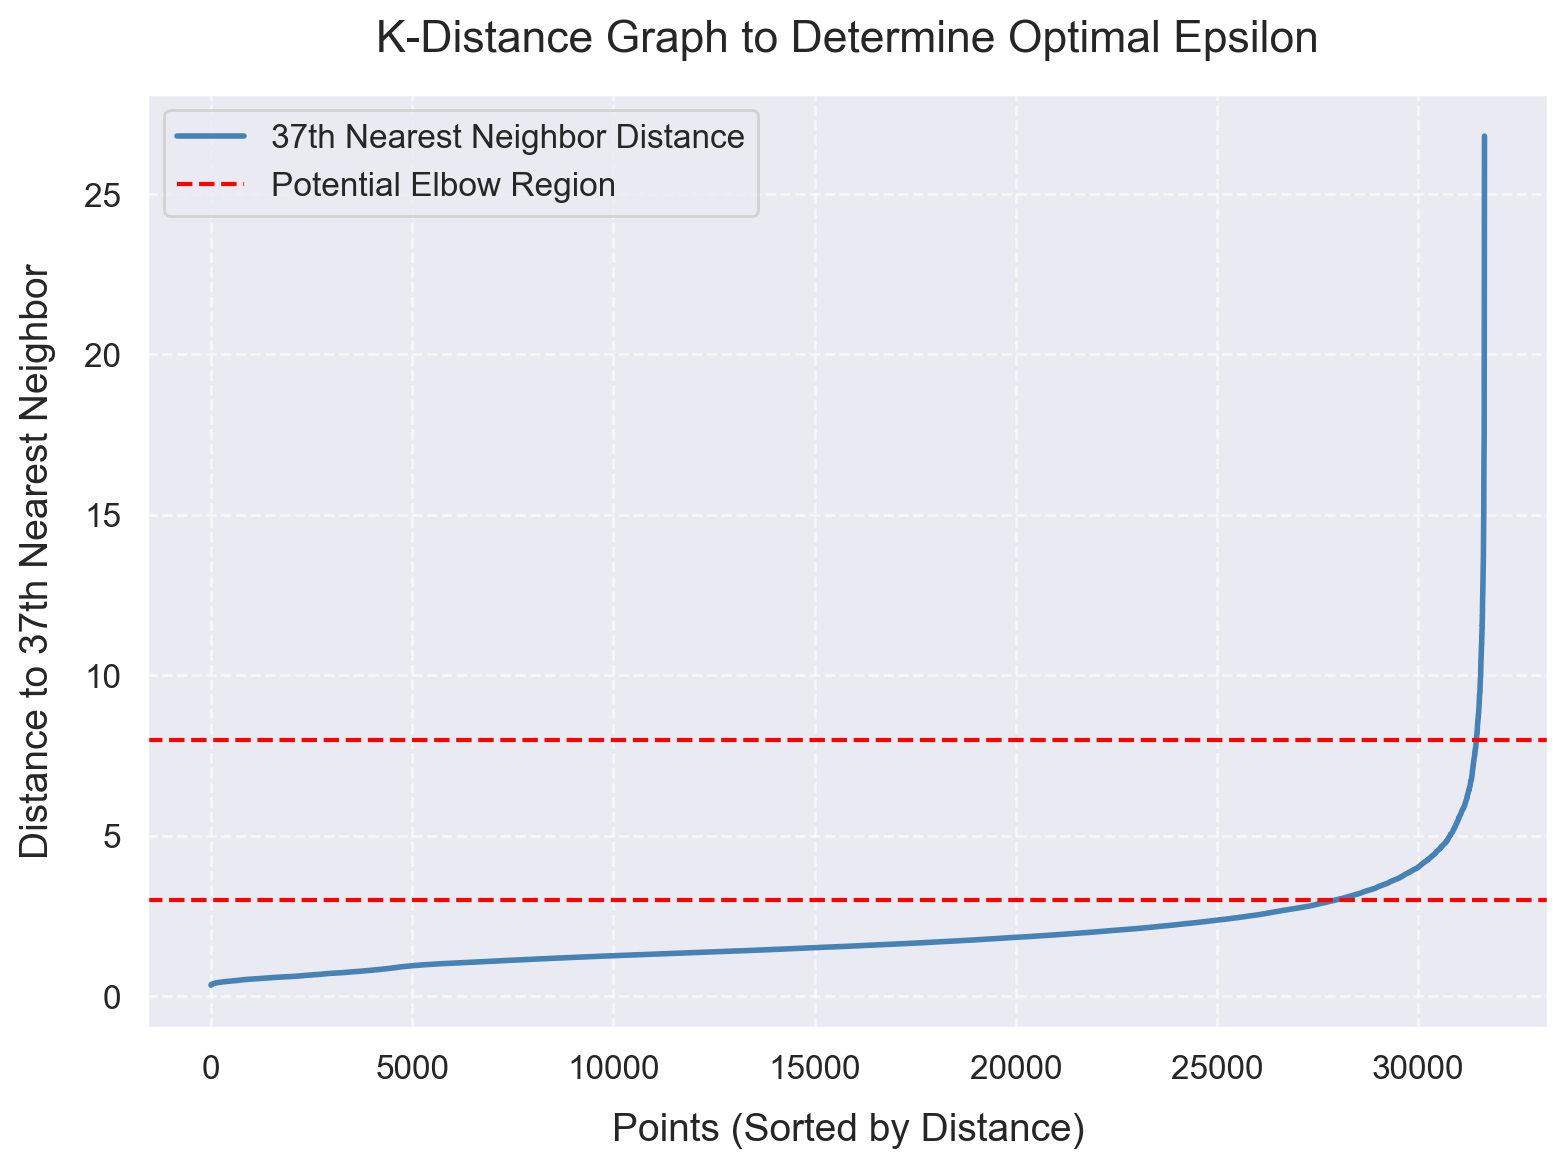

In [178]:
# Compute k-distances
n_neighbors = (dim*2)-1  # Number of neighbors to consider (MinPts-1)
neigh = NearestNeighbors(n_neighbors=n_neighbors)
neigh.fit(df[metric_features])
distances, _ = neigh.kneighbors(df[metric_features])

# Sort distances for plotting
distances = np.sort(distances[:, -1])

# Plot k-distance graph
plt.figure(figsize=(8, 6)) 
plt.plot(distances, color='steelblue', linewidth=2, label=f"{n_neighbors}th Nearest Neighbor Distance")

# Add labels and title
plt.title("K-Distance Graph to Determine Optimal Epsilon", fontsize=16, pad=15)
plt.xlabel("Points (Sorted by Distance)", fontsize=14, labelpad=10)
plt.ylabel(f"Distance to {n_neighbors}th Nearest Neighbor", fontsize=14, labelpad=10)

# Add a grid
plt.grid(visible=True, linestyle="--", alpha=0.6)

# Highlight the "elbow" area
plt.axhline(y=8, color='red', linestyle="--", linewidth=1.5, label="Potential Elbow Region")
plt.axhline(y=3, color='red', linestyle="--", linewidth=1.5)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12, loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()

In [83]:
# eps_values = np.arange(3, 8, 1) 
# n_jobs_values = [1, 4, -1]

# for eps in eps_values:
#     for n_jobs in n_jobs_values:
      
#         dbscan = DBSCAN(eps=eps, min_samples=30, n_jobs=n_jobs)
#         dbscan_labels = dbscan.fit_predict(df[metric_features])

     
#         dbscan_n_clusters = len(np.unique(dbscan_labels))

#         print(f"EPS: {eps}, n_jobs: {n_jobs} => clusters: {dbscan_n_clusters}")

In [179]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=dim*2, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df[metric_features])

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 2


In [180]:
Counter(dbscan_labels)

Counter({0: 31287, -1: 361})

In [181]:
# Concatenating the labels to df
df_concat = pd.concat([df[metric_features], pd.Series(dbscan_labels, index=df.index, name="dbscan_labels")], axis=1)
df_concat.head()

,customer_age,first_order,last_order,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),Sum_of_Orders,recency,active_period,frequency,total_spend,cuisine_diversity,Weekdays,Weekends,Main Courses,Snacks and Street Food,Desserts and Beverages,Healthy and Special Diets,dbscan_labels
customer_id,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,-1.338050,-1.183266,-2.691007,-0.390814,-0.593880,-0.698477,0.663266,-0.498308,2.691007,-1.160188,1.557000,-0.194602,-0.860516,0,0.488075,0.144187,-0.340593,-0.328655,-0.173833,0
5d272b9dcb,-1.479296,-1.183266,-2.691007,-0.390814,0.431970,-0.698477,-0.497101,-0.498308,2.691007,-1.160188,1.557000,-0.442515,-0.177250,0,0.488075,-0.180168,-0.340593,-0.328655,-0.173833,0
f6d1b2ba63,1.486865,-1.183266,-2.691007,-0.390814,0.431970,-0.698477,-0.497101,-0.498308,2.691007,-1.160188,1.557000,-0.699144,-0.860516,0,0.488075,-0.515927,-0.340593,-0.328655,-0.173833,0
180c632ed8,-0.208084,-1.183266,-2.647970,-0.390814,-0.080955,-0.295483,-0.497101,-0.498308,2.647970,-1.126053,0.754685,-0.125894,-0.177250,1,-0.131474,0.234080,-0.340593,-0.328655,-0.173833,0
4eb37a6705,-1.055558,-1.183266,-2.647970,-0.390814,0.431970,-0.698477,-0.497101,-0.498308,2.647970,-1.126053,0.754685,0.486325,-0.177250,1,-0.131474,1.035072,-0.340593,-0.328655,-0.173833,0


In [182]:
# Detecting noise (potential outliers)
num_noise = len(df_concat.loc[df_concat['dbscan_labels'] == -1])
total_points = len(df_concat)
percent_outliers = (num_noise / total_points) * 100

print(num_noise)
print(f"Percentage of potencial outliers: {percent_outliers:.2f}%")

361
Percentage of potencial outliers: 1.14%


In [183]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [184]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df[metric_features])  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.2021


C:\Users\anama\AppData\Local\Temp\ipykernel_4788\1461256281.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels


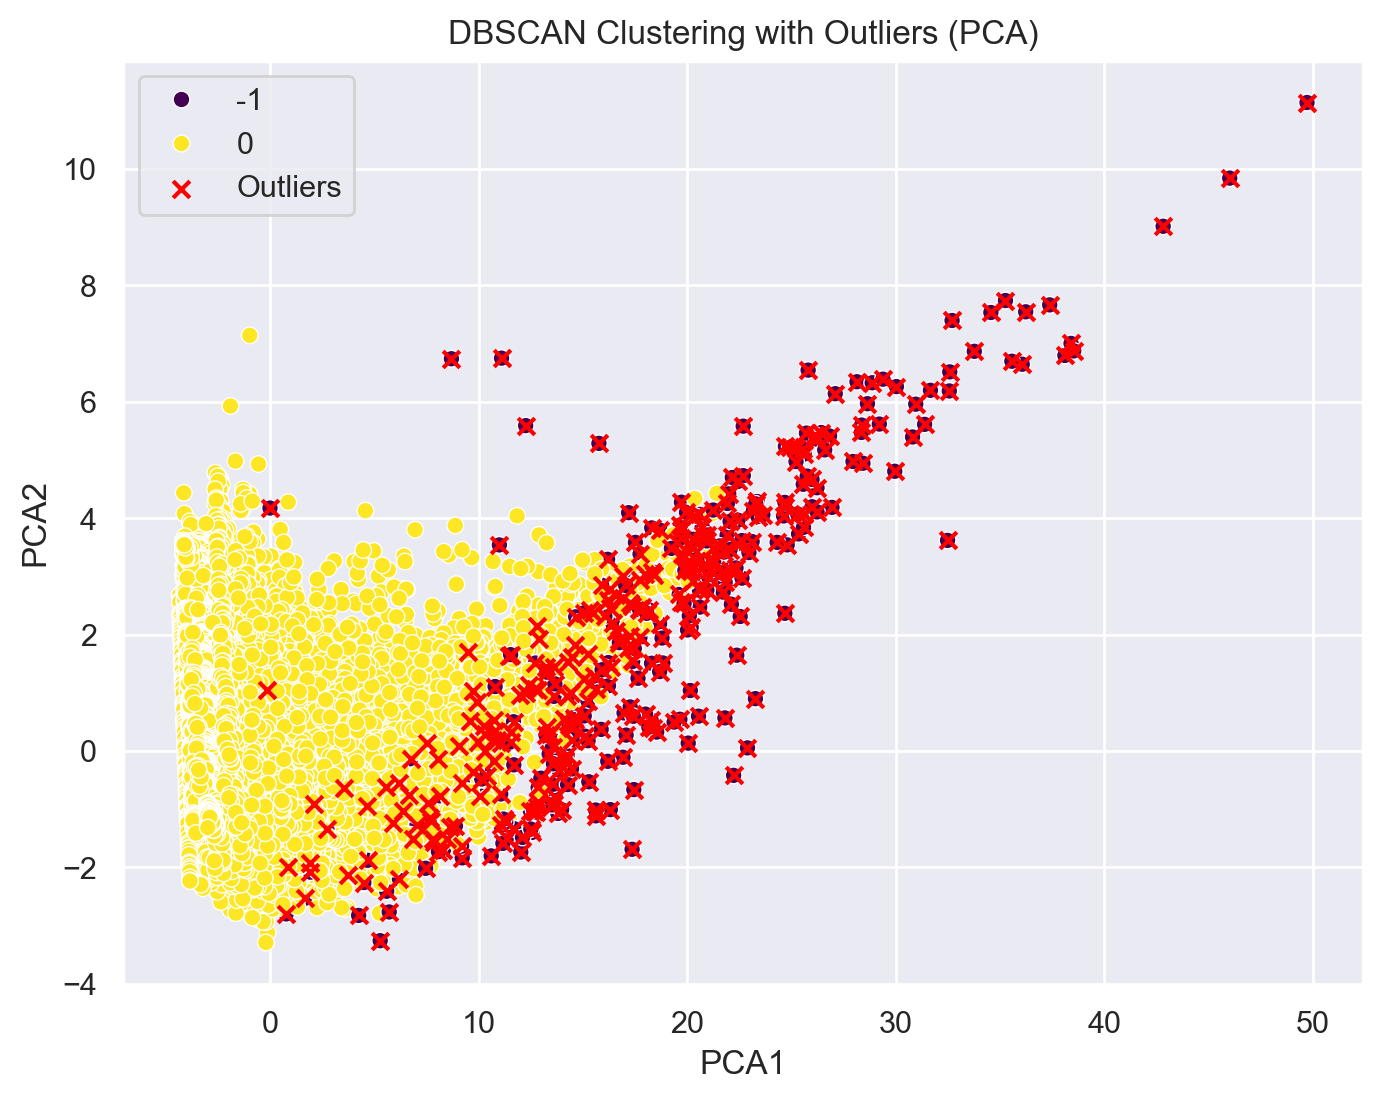

In [185]:
# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_concat[metric_features])  # Use your features for clustering

# Create a new dataframe with PCA components and cluster labels
df_concat['PCA1'] = pca_result[:, 0]
df_concat['PCA2'] = pca_result[:, 1]

# Scatter plot of PCA components with cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_concat, x='PCA1', y='PCA2', hue='dbscan_labels', palette='viridis', legend='full')

# Highlight outliers
outliers = df_concat[df_concat['dbscan_labels'] == -1]
plt.scatter(outliers['PCA1'], outliers['PCA2'], color='red', label='Outliers', marker='x')

plt.title('DBSCAN Clustering with Outliers (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


In [186]:
# Save the newly detected outliers (they will be classified later based on the final clusters)
df_out = df[dbscan_labels==-1].copy()

# New df without outliers 
df = df[dbscan_labels!=-1].copy()

## Clustering by perspectives

In [ ]:
fig = plt.figure(figsize=(24, 18))  # Increased size for clarity

# Compute Spearman correlation
corr = np.round(df[metric_features].corr(method="spearman"), decimals=2)

# Mask for upper triangle and annotations threshold
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape, ""))  # Annotate only significant correlations

# Mask upper triangle
matrix = np.triu(np.ones_like(corr, dtype=bool))

# Customize the heatmap
sns.heatmap(
    data=corr,
    annot=annot,                   # Show annotations
    mask=matrix,                   # Apply mask to hide upper triangle
    cmap='PiYG',               # Adjust colormap for better clarity
    fmt='',                        # Avoid formatting issues
    annot_kws={"size": 8},        # Font size for annotations
    vmin=-1, vmax=1, center=0,     # Set limits for the colormap
    square=True, linewidths=.5,    # Keep square cells with a border
    cbar_kws={"shrink": 0.8}       # Shrink color bar for better fit
)

# Title and labels
fig.subplots_adjust(top=0.9)       # Adjust layout to fit the title
fig.suptitle("Correlation Matrix", fontsize=22, weight='bold')  # Bold, larger title
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=12)               # Keep y-axis labels horizontal

# Display the heatmap
plt.show()


In [123]:
metric_features.remove('active_period')
metric_features.remove('last_order')


unused_features.extend(['active_period', 'last_order'])

In [ ]:
fig = plt.figure(figsize=(24, 18))  # Increased size for clarity

# Compute Spearman correlation
corr = np.round(df[metric_features].corr(method="spearman"), decimals=2)

# Mask for annotations near 0 (e.g., absolute correlation < 0.2)
mask_annot = (np.absolute(corr.values) < 0.2)  # You can adjust the threshold to be closer to 0
annot = np.where(mask_annot, corr.values, np.full(corr.shape, ""))  # Annotate only near-zero correlations

# Mask upper triangle
matrix = np.triu(np.ones_like(corr, dtype=bool))

# Customize the heatmap
sns.heatmap(
    data=corr,
    annot=annot,                   # Show annotations for near-zero correlations
    mask=matrix,                   # Apply mask to hide upper triangle
    cmap='PiYG',                   # Adjust colormap for better clarity
    fmt='',                        # Avoid formatting issues
    annot_kws={"size": 8},         # Font size for annotations
    vmin=-1, vmax=1, center=0,     # Set limits for the colormap
    square=True, linewidths=.5,    # Keep square cells with a border
    cbar_kws={"shrink": 0.8}       # Shrink color bar for better fit
)

# Title and labels
fig.subplots_adjust(top=0.9)       # Adjust layout to fit the title
fig.suptitle("Correlation Matrix (Near Zero)", fontsize=22, weight='bold')  # Bold, larger title
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=12)               # Keep y-axis labels horizontal

# Display the heatmap
plt.show()


Notes:
* Customer_age does not seem to have a relevant correlation to any variable

In [ ]:
metric_features

In [187]:
# 1. Value-Based Segmentation
value_based_features = ['total_spend', 'frequency', 'recency', 'Sum_of_Orders']

# 2. Preference and Behavior-Based Segmentation
preference_behavior_features = ['Main Courses','Snacks and Street Food', 'Desserts and Beverages','Healthy and Special Diets',
                                'early_morning(0h-5h)', 'morning(6h-11h)', 'afternoon(12h-17h)', 'night(18h-23h)',
                                'Weekdays', 'Weekends']

# 3. Demographic Segmentation
demographic_features = ['customer_age', 'first_order']

df_value = df[value_based_features].copy()
df_prf = df[preference_behavior_features].copy()
df_dem = df[demographic_features].copy()



In [188]:
# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

In [189]:
def get_ss(df, feats):
    """
    Calculate the sum of squares (SS) for the given DataFrame.

    The sum of squares is computed as the sum of the variances of each column
    multiplied by the number of non-NA/null observations minus one.

    Parameters:
    df (pandas.DataFrame): The input DataFrame for which the sum of squares is to be calculated.
    feats (list of str): A list of feature column names to be used in the calculation.

    Returns:
    float: The sum of squares of the DataFrame.
    """
    df_ = df[feats]
    ss = np.sum(df_.var() * (df_.count() - 1))
    
    return ss 


def get_ssb(df, feats, label_col):
    """
    Calculate the between-group sum of squares (SSB) for the given DataFrame.
    The between-group sum of squares is computed as the sum of the squared differences
    between the mean of each group and the overall mean, weighted by the number of observations
    in each group.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column in the DataFrame that contains the group labels.
    
    Returns
    float: The between-group sum of squares of the DataFrame.
    """
    
    ssb_i = 0
    for i in np.unique(df[label_col]):
        df_ = df.loc[:, feats]
        X_ = df_.values
        X_k = df_.loc[df[label_col] == i].values
        
        ssb_i += (X_k.shape[0] * (np.square(X_k.mean(axis=0) - X_.mean(axis=0))) )

    ssb = np.sum(ssb_i)
    

    return ssb


def get_ssw(df, feats, label_col):
    """
    Calculate the sum of squared within-cluster distances (SSW) for a given DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing cluster labels.

    Returns:
    float: The sum of squared within-cluster distances (SSW).
    """
    feats_label = feats+[label_col]

    df_k = df[feats_label].groupby(by=label_col).apply(lambda col: get_ss(col, feats), 
                                                       include_groups=False)

    return df_k.sum()


In [190]:
def get_rsq(df, feats, label_col):
    """
    Calculate the R-squared value for a given DataFrame and features.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    feats (list): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing the labels or cluster assignments.

    Returns:
    float: The R-squared value, representing the proportion of variance explained by the clustering.
    """

    df_sst_ = get_ss(df, feats)                 # get total sum of squares
    df_ssw_ = get_ssw(df, feats, label_col)     # get ss within
    df_ssb_ = df_sst_ - df_ssw_                 # get ss between

    # r2 = ssb/sst 
    return (df_ssb_/df_sst_)

In [191]:
def get_r2_scores(df, feats, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        df_concat = pd.concat([df, 
                               pd.Series(labels, name='labels', index=df.index)], axis=1)  

        r2_clust[n] = get_rsq(df_concat, feats, 'labels' )
    return r2_clust

### 1. Value-Based 

In [ ]:
# range_clusters = range(1, 11)
# inertia = []
# for n_clus in range_clusters:  # iterate over desired ncluster range
#     kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
#     kmclust.fit(df_value)
#     inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

In [160]:
# # The inertia plot

# fig, ax = plt.subplots(figsize=(9,5))

# ax.plot(range_clusters, inertia)
# ax.set_xticks(range_clusters)
# ax.set_ylabel("Inertia: SSw")
# ax.set_xlabel("Number of clusters")
# ax.set_title("Inertia plot over clusters", size=15)

# plt.show()

In [ ]:
# # Storing average silhouette metric
# avg_silhouette = []
# for nclus in range_clusters:
#     # Skip nclus == 1
#     if nclus == 1:
#         continue
    
#     # Create a figure
#     fig = plt.figure(figsize=(13, 7))

#     # Initialize the KMeans object with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
#     cluster_labels = kmclust.fit_predict(df_value)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed clusters
#     silhouette_avg = silhouette_score(df_value, cluster_labels)
#     avg_silhouette.append(silhouette_avg)
#     print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(df_value, cluster_labels)

#     y_lower = 10
#     for i in range(nclus):
#         # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
#         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
#         ith_cluster_silhouette_values.sort()
        
#         # Get y_upper to demarcate silhouette y range size
#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i
        
#         # Filling the silhouette
#         color = cm.nipy_spectral(float(i) / nclus)
#         plt.fill_betweenx(np.arange(y_lower, y_upper),
#                           0, ith_cluster_silhouette_values,
#                           facecolor=color, edgecolor=color, alpha=0.7)

#         # Label the silhouette plots with their cluster numbers at the middle
#         plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     plt.title("The silhouette plot for the various clusters.")
#     plt.xlabel("The silhouette coefficient values")
#     plt.ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
#     # The silhouette coefficient can range from -1, 1
#     xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
#     plt.xlim([xmin, xmax])
    
#     # The (nclus+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     plt.ylim([0, len(df_value) + (nclus + 1) * 10])

#     plt.yticks([])  # Clear the yaxis labels / ticks
#     plt.xticks(np.arange(xmin, xmax, 0.1))

In [133]:
# Obtaining the R² scores for each cluster solution on value based variables
r2_scores = {}

r2_scores['kmeans'] = get_r2_scores(df_value, value_based_features, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_value,                 # data
        value_based_features,   # features of perspective
        # use HClust, changing the linkage at each iteration
        hierarchical.set_params(linkage=linkage) 
    )

In [ ]:
r2_scores_df = pd.DataFrame(r2_scores)
r2_scores_df

In [ ]:
# Visualizing the R² scores for each cluster solution on value based variables
r2_scores_df.plot.line(figsize=(10,7))

plt.title("Value Based Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()      

- Kmeans
- number of clusters = 3

## 2. Preference Behaviour

In [136]:
# Obtaining the R² scores for each cluster solution on value Preference Behaviour variables
r2_scores = {}

r2_scores['kmeans'] = get_r2_scores(df_prf,preference_behavior_features, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_prf,                 # data
        preference_behavior_features,   # features of perspective
        # use HClust, changing the linkage at each iteration
        hierarchical.set_params(linkage=linkage) 
    ) 

In [ ]:
r2_scores_df = pd.DataFrame(r2_scores)
r2_scores_df

In [ ]:
# Visualizing the R² scores for each cluster solution on Preference Behaviour variables
r2_scores_df.plot.line(figsize=(10,7))

plt.title("Preference Behaviour:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

- Kmeans
- 3 clusters

## Merging the Perspectives

In [192]:
# Applying the right clustering (algorithm and number of clusters) for each perspective
kmeans_value = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=20,
    random_state=42
)
prod_labels = kmeans_value.fit_predict(df_value)

kmeans_prf = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=20,
    random_state=42
)
behavior_labels = kmeans_prf.fit_predict(df_prf)

df['Value_labels'] = prod_labels
df['Preference_labels'] = behavior_labels

In [193]:
# Count label frequencies (contigency table)

pd.crosstab(df['Value_labels'],
            df['Preference_labels'])

Preference_labels,0,1,2
Value_labels,,,
0,4198,14296,29
1,48,8224,0
2,2616,157,1719


- clusters with few points:
  
  * (0,2)
  * (1,0)
  * (2,1)
  * (1,2) = 0, don't consider

### Manual merging: Merge lowest frequency clusters into closest clusters

In [194]:
metrics = ['total_spend', 'frequency', 'recency', 'Sum_of_Orders', 
'Main Courses','Snacks and Street Food', 'Desserts and Beverages','Healthy and Special Diets',
'early_morning(0h-5h)', 'morning(6h-11h)', 'afternoon(12h-17h)', 'night(18h-23h)','Weekdays', 'Weekends']

In [195]:
# Get centroids of clusters
df_centroids = df.groupby(['Value_labels', 'Preference_labels'])\
    [metrics].mean()


df_centroids

total_spend  frequency   recency  Sum_of_Orders  Main Courses  Snacks and Street Food  Desserts and Beverages  Healthy and Special Diets  early_morning(0h-5h)  morning(6h-11h)  afternoon(12h-17h)  night(18h-23h)  Weekdays   Weekends
Value_labels Preference_labels                                                                                                                                                                                                                                          
0            0                   0.017822   -0.563319  -0.446985    0.373033       0.037211          -0.096137                0.022112                 0.018177                 0.037740           0.134576           0.326478          0.306421      4.666270 -0.023887
             1                  -0.288102   -0.583842  -0.086835   -0.305010      -0.236669          -0.129205               -0.087425                -0.062561                -0.084103          -0.203768          -0.226053         -0.167968      1.857093 -0.134724
             2                  -0.168266   -0.449563  -0.481882    1.277899      -0.206169          -0.107019               -0.000494                -0.069589                -0.300601           0.396596           0.885704          1.743607      9.241379 -0.387839
1            0                   0.139388    1.561016   1.130008    0.258080       0.003267           0.224046                0.093824                 0.161625                 0.281402           0.314425          -0.026821          0.155605      4.250000 -0.079845
             1                  -0.540396    1.548830   0.824672   -0.677629      -0.490993          -0.159676               -0.167731                -0.117431                -0.247344          -0.429349          -0.500802         -0.361367      0.851775 -0.529239
2            0                   1.472793   -0.527346  -0.713251    0.896325       1.281848           0.754185                0.524467                 0.145870                 0.779606           0.734705           0.529143          0.180223      5.615826  0.816559
             1                   1.772608   -0.578094  -0.527745    0.068260       1.194896           2.000683                0.310378                -0.024147                 0.575678           0.258817          -0.082436         -0.382542      1.840764  0.894531
             2                   1.671683   -0.348614  -0.834197    2.502690       1.587338           0.320081                0.275894                 0.176043                 0.166719           1.473932           2.037845          1.686940     11.350204  1.649684

In [203]:
# Clusters with low frequency to be merged:
# (Value_label, Preferences_label)
to_merge = [(0,2), (1,0),(2,1)]

In [204]:
# Computing the euclidean distance matrix between the centroids
centroid_dists = euclidean = pairwise_distances(df_centroids)

df_dists = pd.DataFrame(
    centroid_dists, 
    columns=df_centroids.index, 
    index=df_centroids.index
)

df_dists

Value_labels                       0                              1                    2                             
Preference_labels                  0         1          2         0         1          0         1            2      
Value_labels Preference_labels                                                                                       
0            0                  0.000000   3.056387  4.955864  2.751869   4.915955  2.753058   4.332937  8.015804e+00
             1                  3.056387   0.000000  7.911528  3.622421   2.648288  5.078875   3.619587  1.099101e+01
             2                  4.955864   7.911528  0.000000  6.058035   9.339228  4.962239   8.626191  4.456902e+00
1            0                  2.751869   3.622421  6.058035  0.000000   3.878586  3.930556   4.671340  8.877638e+00
             1                  4.915955   2.648288  9.339228  3.878586   0.000000  6.782599   4.933303  1.247363e+01
2            0                  2.753058   5.078875  4.962239  3.930556   6.782599  0.000000   4.202926  6.485111e+00
             1                  4.332937   3.619587  8.626191  4.671340   4.933303  4.202926   0.000000  1.051307e+01
             2                  8.015804  10.991014  4.456902  8.877638  12.473626  6.485111  10.513073  2.384186e-07

In [206]:
# Merging each low frequency clustering (source) 
# to the closest cluster (target)

source_target = {}

for clus in to_merge:
    # If cluster to merge (source) has not yet been used as target
    if clus not in source_target.values():
        # Add this cluster to source_target map as key
        # Use the cluster with the smallest distance to it as value
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target


{(0, 2): (2, 2), (1, 0): (0, 0), (2, 1): (0, 1)}

In [209]:
df_ = df.copy()

# Changing the Value_labels and Preferences_labels based on source_target
for source, target in source_target.items():
    mask = (df_['Value_labels']==source[0]) & (df_['Preference_labels']==source[1])
    df_.loc[mask, 'Value_labels'] = target[0]
    df_.loc[mask, 'Preference_labels'] = target[1]

In [210]:
# New contigency table

pd.crosstab(df_['Value_labels'],
            df_['Preference_labels'])

Preference_labels,0,1,2
Value_labels,,,
0,4246,14453,0
1,0,8224,0
2,2616,0,1748


### Merging using Hierarchical clustering

Doesnt care about how large our clustering is; just how far from the others are

In [211]:
# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['Value_labels', 'Preference_labels'])\
    [metrics].mean()
df_centroids

total_spend  frequency   recency  Sum_of_Orders  Main Courses  Snacks and Street Food  Desserts and Beverages  Healthy and Special Diets  early_morning(0h-5h)  morning(6h-11h)  afternoon(12h-17h)  night(18h-23h)  Weekdays   Weekends
Value_labels Preference_labels                                                                                                                                                                                                                                          
0            0                   0.017822   -0.563319  -0.446985    0.373033       0.037211          -0.096137                0.022112                 0.018177                 0.037740           0.134576           0.326478          0.306421      4.666270 -0.023887
             1                  -0.288102   -0.583842  -0.086835   -0.305010      -0.236669          -0.129205               -0.087425                -0.062561                -0.084103          -0.203768          -0.226053         -0.167968      1.857093 -0.134724
             2                  -0.168266   -0.449563  -0.481882    1.277899      -0.206169          -0.107019               -0.000494                -0.069589                -0.300601           0.396596           0.885704          1.743607      9.241379 -0.387839
1            0                   0.139388    1.561016   1.130008    0.258080       0.003267           0.224046                0.093824                 0.161625                 0.281402           0.314425          -0.026821          0.155605      4.250000 -0.079845
             1                  -0.540396    1.548830   0.824672   -0.677629      -0.490993          -0.159676               -0.167731                -0.117431                -0.247344          -0.429349          -0.500802         -0.361367      0.851775 -0.529239
2            0                   1.472793   -0.527346  -0.713251    0.896325       1.281848           0.754185                0.524467                 0.145870                 0.779606           0.734705           0.529143          0.180223      5.615826  0.816559
             1                   1.772608   -0.578094  -0.527745    0.068260       1.194896           2.000683                0.310378                -0.024147                 0.575678           0.258817          -0.082436         -0.382542      1.840764  0.894531
             2                   1.671683   -0.348614  -0.834197    2.502690       1.587338           0.320081                0.275894                 0.176043                 0.166719           1.473932           2.037845          1.686940     11.350204  1.649684

In [212]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)

hclust_labels = hclust.fit_predict(df_centroids)

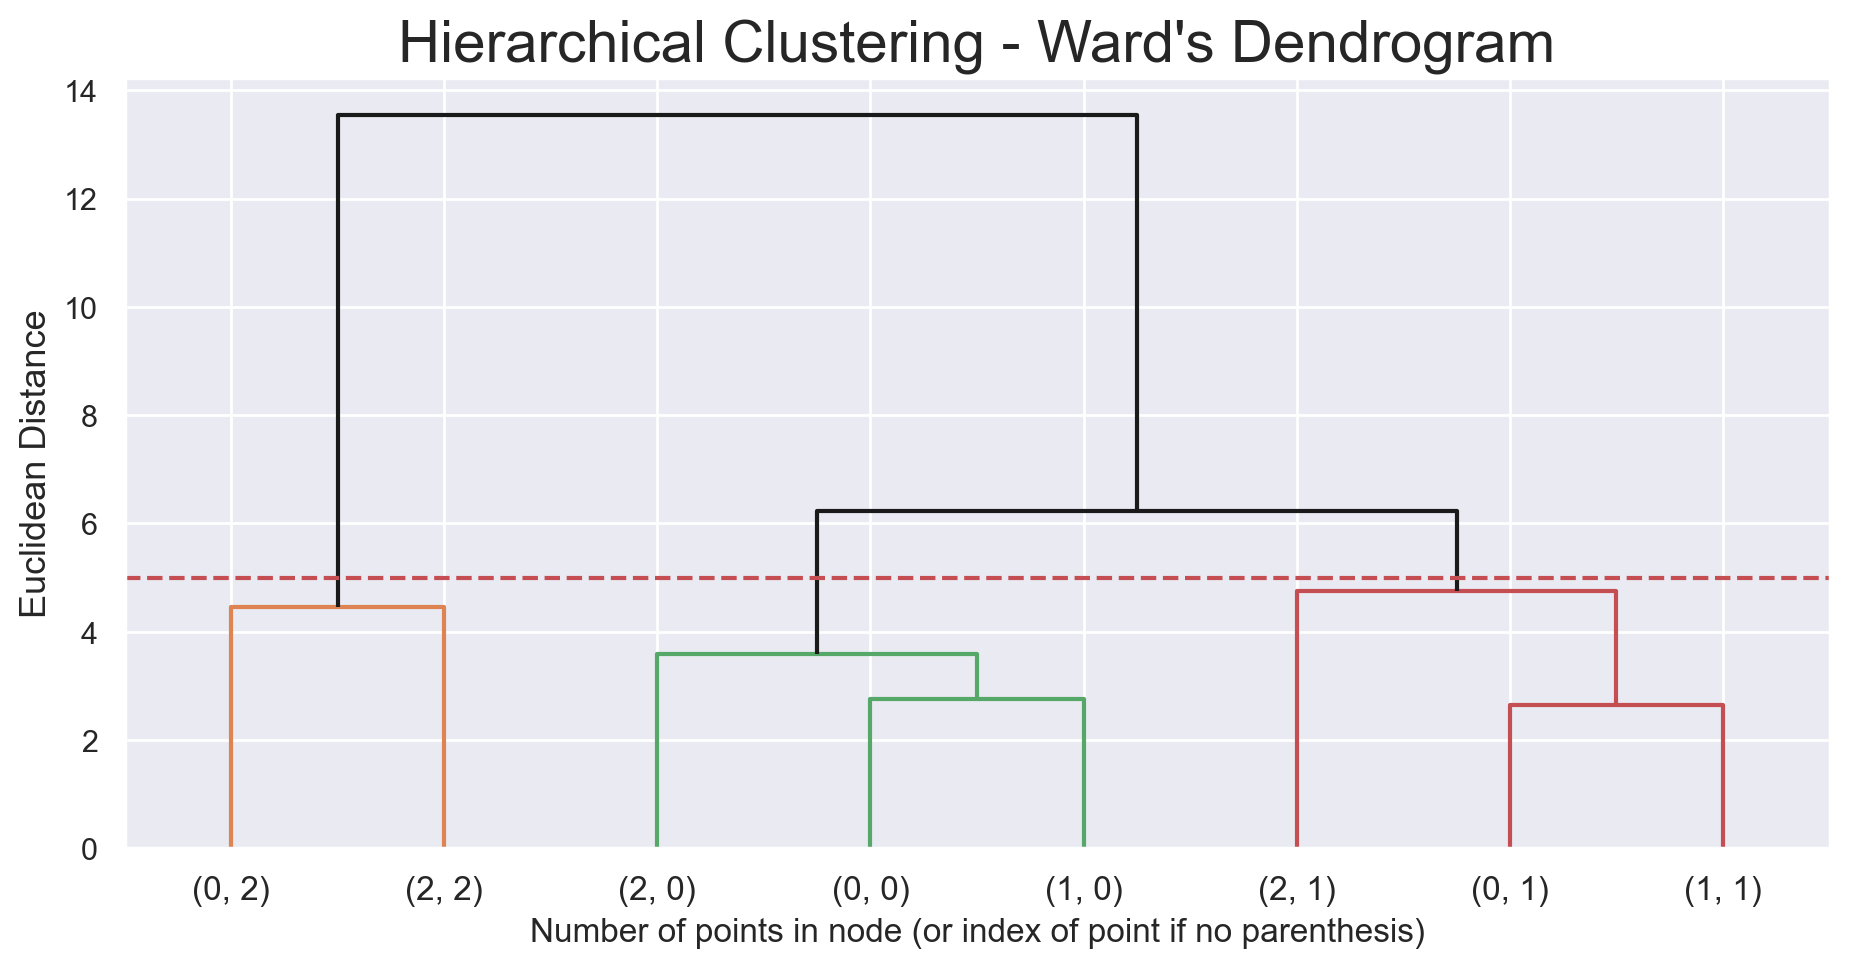

In [216]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned

y_threshold = 5

dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [217]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=7
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

total_spend  frequency   recency  Sum_of_Orders  Main Courses  Snacks and Street Food  Desserts and Beverages  Healthy and Special Diets  early_morning(0h-5h)  morning(6h-11h)  afternoon(12h-17h)  night(18h-23h)  Weekdays   Weekends  hclust_labels
Value_labels Preference_labels                                                                                                                                                                                                                                                         
0            0                   0.017822   -0.563319  -0.446985    0.373033       0.037211          -0.096137                0.022112                 0.018177                 0.037740           0.134576           0.326478          0.306421      4.666270 -0.023887        6      
             1                  -0.288102   -0.583842  -0.086835   -0.305010      -0.236669          -0.129205               -0.087425                -0.062561                -0.084103          -0.203768          -0.226053         -0.167968      1.857093 -0.134724        0      
             2                  -0.168266   -0.449563  -0.481882    1.277899      -0.206169          -0.107019               -0.000494                -0.069589                -0.300601           0.396596           0.885704          1.743607      9.241379 -0.387839        4      
1            0                   0.139388    1.561016   1.130008    0.258080       0.003267           0.224046                0.093824                 0.161625                 0.281402           0.314425          -0.026821          0.155605      4.250000 -0.079845        3      
             1                  -0.540396    1.548830   0.824672   -0.677629      -0.490993          -0.159676               -0.167731                -0.117431                -0.247344          -0.429349          -0.500802         -0.361367      0.851775 -0.529239        0      
2            0                   1.472793   -0.527346  -0.713251    0.896325       1.281848           0.754185                0.524467                 0.145870                 0.779606           0.734705           0.529143          0.180223      5.615826  0.816559        5      
             1                   1.772608   -0.578094  -0.527745    0.068260       1.194896           2.000683                0.310378                -0.024147                 0.575678           0.258817          -0.082436         -0.382542      1.840764  0.894531        1      
             2                   1.671683   -0.348614  -0.834197    2.502690       1.587338           0.320081                0.275894                 0.176043                 0.166719           1.473932           2.037845          1.686940     11.350204  1.649684        2

In [218]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()
cluster_mapper

{(0, 0): 6,
 (0, 1): 0,
 (0, 2): 4,
 (1, 0): 3,
 (1, 1): 0,
 (2, 0): 5,
 (2, 1): 1,
 (2, 2): 2}

In [221]:
df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['Value_labels'], row['Preference_labels'])
    ], axis=1
)

df_.head()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),age_group,Sum_of_Orders,recency,active_period,frequency,total_spend,cuisine_diversity,customer_city,Weekdays,Weekends,Main Courses,Snacks and Street Food,Desserts and Beverages,Healthy and Special Diets,enc_payment_method_CARD,enc_payment_method_CASH,enc_payment_method_DIGI,enc_is_chain_0,enc_is_chain_1,enc_customer_city_2,enc_customer_city_4,enc_customer_city_8,enc_age_group,enc_last_promo,Value_labels,Preference_labels,merged_labels
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,-1.338050,-0.399572,-0.069431,1,-1.183266,-2.691007,DELIVERY,DIGI,-0.390814,-0.593880,-0.698477,0.663266,Teenagers (15-19),-0.498308,2.691007,-1.160188,1.557000,-0.194602,-0.860516,2,0,0.488075,0.144187,-0.340593,-0.328655,-0.173833,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1,1,0
5d272b9dcb,-1.479296,-0.399572,-0.583074,1,-1.183266,-2.691007,DISCOUNT,DIGI,-0.390814,0.431970,-0.698477,-0.497101,Teenagers (15-19),-0.498308,2.691007,-1.160188,1.557000,-0.442515,-0.177250,8,0,0.488075,-0.180168,-0.340593,-0.328655,-0.173833,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,1,0
f6d1b2ba63,1.486865,-0.780775,-0.583074,1,-1.183266,-2.691007,DISCOUNT,CASH,-0.390814,0.431970,-0.698477,-0.497101,Adults (30-49),-0.498308,2.691007,-1.160188,1.557000,-0.699144,-0.860516,4,0,0.488075,-0.515927,-0.340593,-0.328655,-0.173833,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1,1,0
180c632ed8,-0.208084,-0.399572,-0.411860,1,-1.183266,-2.647970,DELIVERY,DIGI,-0.390814,-0.080955,-0.295483,-0.497101,Young Adults (20-29),-0.498308,2.647970,-1.126053,0.754685,-0.125894,-0.177250,4,1,-0.131474,0.234080,-0.340593,-0.328655,-0.173833,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1,1,0
4eb37a6705,-1.055558,-0.399572,-0.069431,0,-1.183266,-2.647970,NO PROMO,DIGI,-0.390814,0.431970,-0.698477,-0.497101,Young Adults (20-29),-0.498308,2.647970,-1.126053,0.754685,0.486325,-0.177250,4,1,-0.131474,1.035072,-0.340593,-0.328655,-0.173833,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,0


In [234]:
# Merged cluster centroids
df_.groupby('merged_labels').mean(numeric_only=True)[metrics]

,total_spend,frequency,recency,Sum_of_Orders,Main Courses,Snacks and Street Food,Desserts and Beverages,Healthy and Special Diets,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),Weekdays,Weekends
merged_labels,,,,,,,,,,,,,,
0,-0.380236,0.194981,0.246035,-0.441085,-0.329545,-0.140332,-0.116751,-0.082599,-0.143716,-0.286147,-0.326388,-0.238595,1.489964,-0.278796
1,1.772608,-0.578094,-0.527745,0.068260,1.194896,2.000683,0.310378,-0.024147,0.575678,0.258817,-0.082436,-0.382542,1.840764,0.894531
2,1.671683,-0.348614,-0.834197,2.502690,1.587338,0.320081,0.275894,0.176043,0.166719,1.473932,2.037845,1.686940,11.350204,1.649684
3,0.139388,1.561016,1.130008,0.258080,0.003267,0.224046,0.093824,0.161625,0.281402,0.314425,-0.026821,0.155605,4.250000,-0.079845
4,-0.168266,-0.449563,-0.481882,1.277899,-0.206169,-0.107019,-0.000494,-0.069589,-0.300601,0.396596,0.885704,1.743607,9.241379,-0.387839
5,1.472793,-0.527346,-0.713251,0.896325,1.281848,0.754185,0.524467,0.145870,0.779606,0.734705,0.529143,0.180223,5.615826,0.816559
6,0.017822,-0.563319,-0.446985,0.373033,0.037211,-0.096137,0.022112,0.018177,0.037740,0.134576,0.326478,0.306421,4.666270,-0.023887


In [228]:
# Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

df_counts

,0
merged_labels,
0,22520
1,157
2,1719
3,48
4,29
5,2616
6,4198


In [229]:
# Getting the Value and Preference labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts

,merged_labels,0
0,"(1, 1)",22520
1,"(2, 1)",157
2,"(2, 2)",1719
3,"(1, 0)",48
4,"(0, 2)",29
5,"(2, 0)",2616
6,"(0, 0)",4198


In [230]:
df_counts['Value_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['Preference_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])

df_counts

,merged_labels,0,Value_labels,Preference_labels
0,"(1, 1)",22520,1,1
1,"(2, 1)",157,2,1
2,"(2, 2)",1719,2,2
3,"(1, 0)",48,1,0
4,"(0, 2)",29,0,2
5,"(2, 0)",2616,2,0
6,"(0, 0)",4198,0,0


In [231]:
df_counts.pivot(values=0, index='Value_labels', columns='Preference_labels')

Preference_labels,0,1,2
Value_labels,,,
0,4198.0,NaN,29.0
1,48.0,22520.0,NaN
2,2616.0,157.0,1719.0


In [232]:
# Setting df to have the final product, behavior and merged clusters
df = df_.copy()

# Cluster Analysis

In [233]:
def cluster_profiles(df, label_columns, figsize, 
                     cmap="tab10",
                     compare_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    
    if compare_titles == None:
        compare_titles = [""]*len(label_columns)
        
    fig, axes = plt.subplots(nrows=len(label_columns), 
                             ncols=2, 
                             figsize=figsize, 
                             constrained_layout=True,
                             squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compare_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, 
                                            label, 
                                            color = sns.color_palette(cmap),
                                            ax=ax[0])



        sns.barplot(x=label, 
                    hue=label,
                    y="counts", 
                    data=counts, 
                    ax=ax[1], 
                    palette=sns.color_palette(cmap),
                    legend=False
                    )

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), 
                              rotation=40,
                              ha='right'
                              )
        
        ax[0].legend(handles, cluster_labels,
                     loc='center left', bbox_to_anchor=(1, 0.5), title=label
                     ) # Adaptable to number of clusters
        
        ax[1].set_xticks([i for i in range(len(handles))])
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
        
        
    
    # plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profiling", fontsize=23)
    plt.show()

C:\Users\anama\AppData\Local\Temp\ipykernel_4788\2074131698.py:35: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=label,
C:\Users\anama\AppData\Local\Temp\ipykernel_4788\2074131698.py:35: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=label,
C:\Users\anama\AppData\Local\Temp\ipykernel_4788\2074131698.py:35: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(x=label,


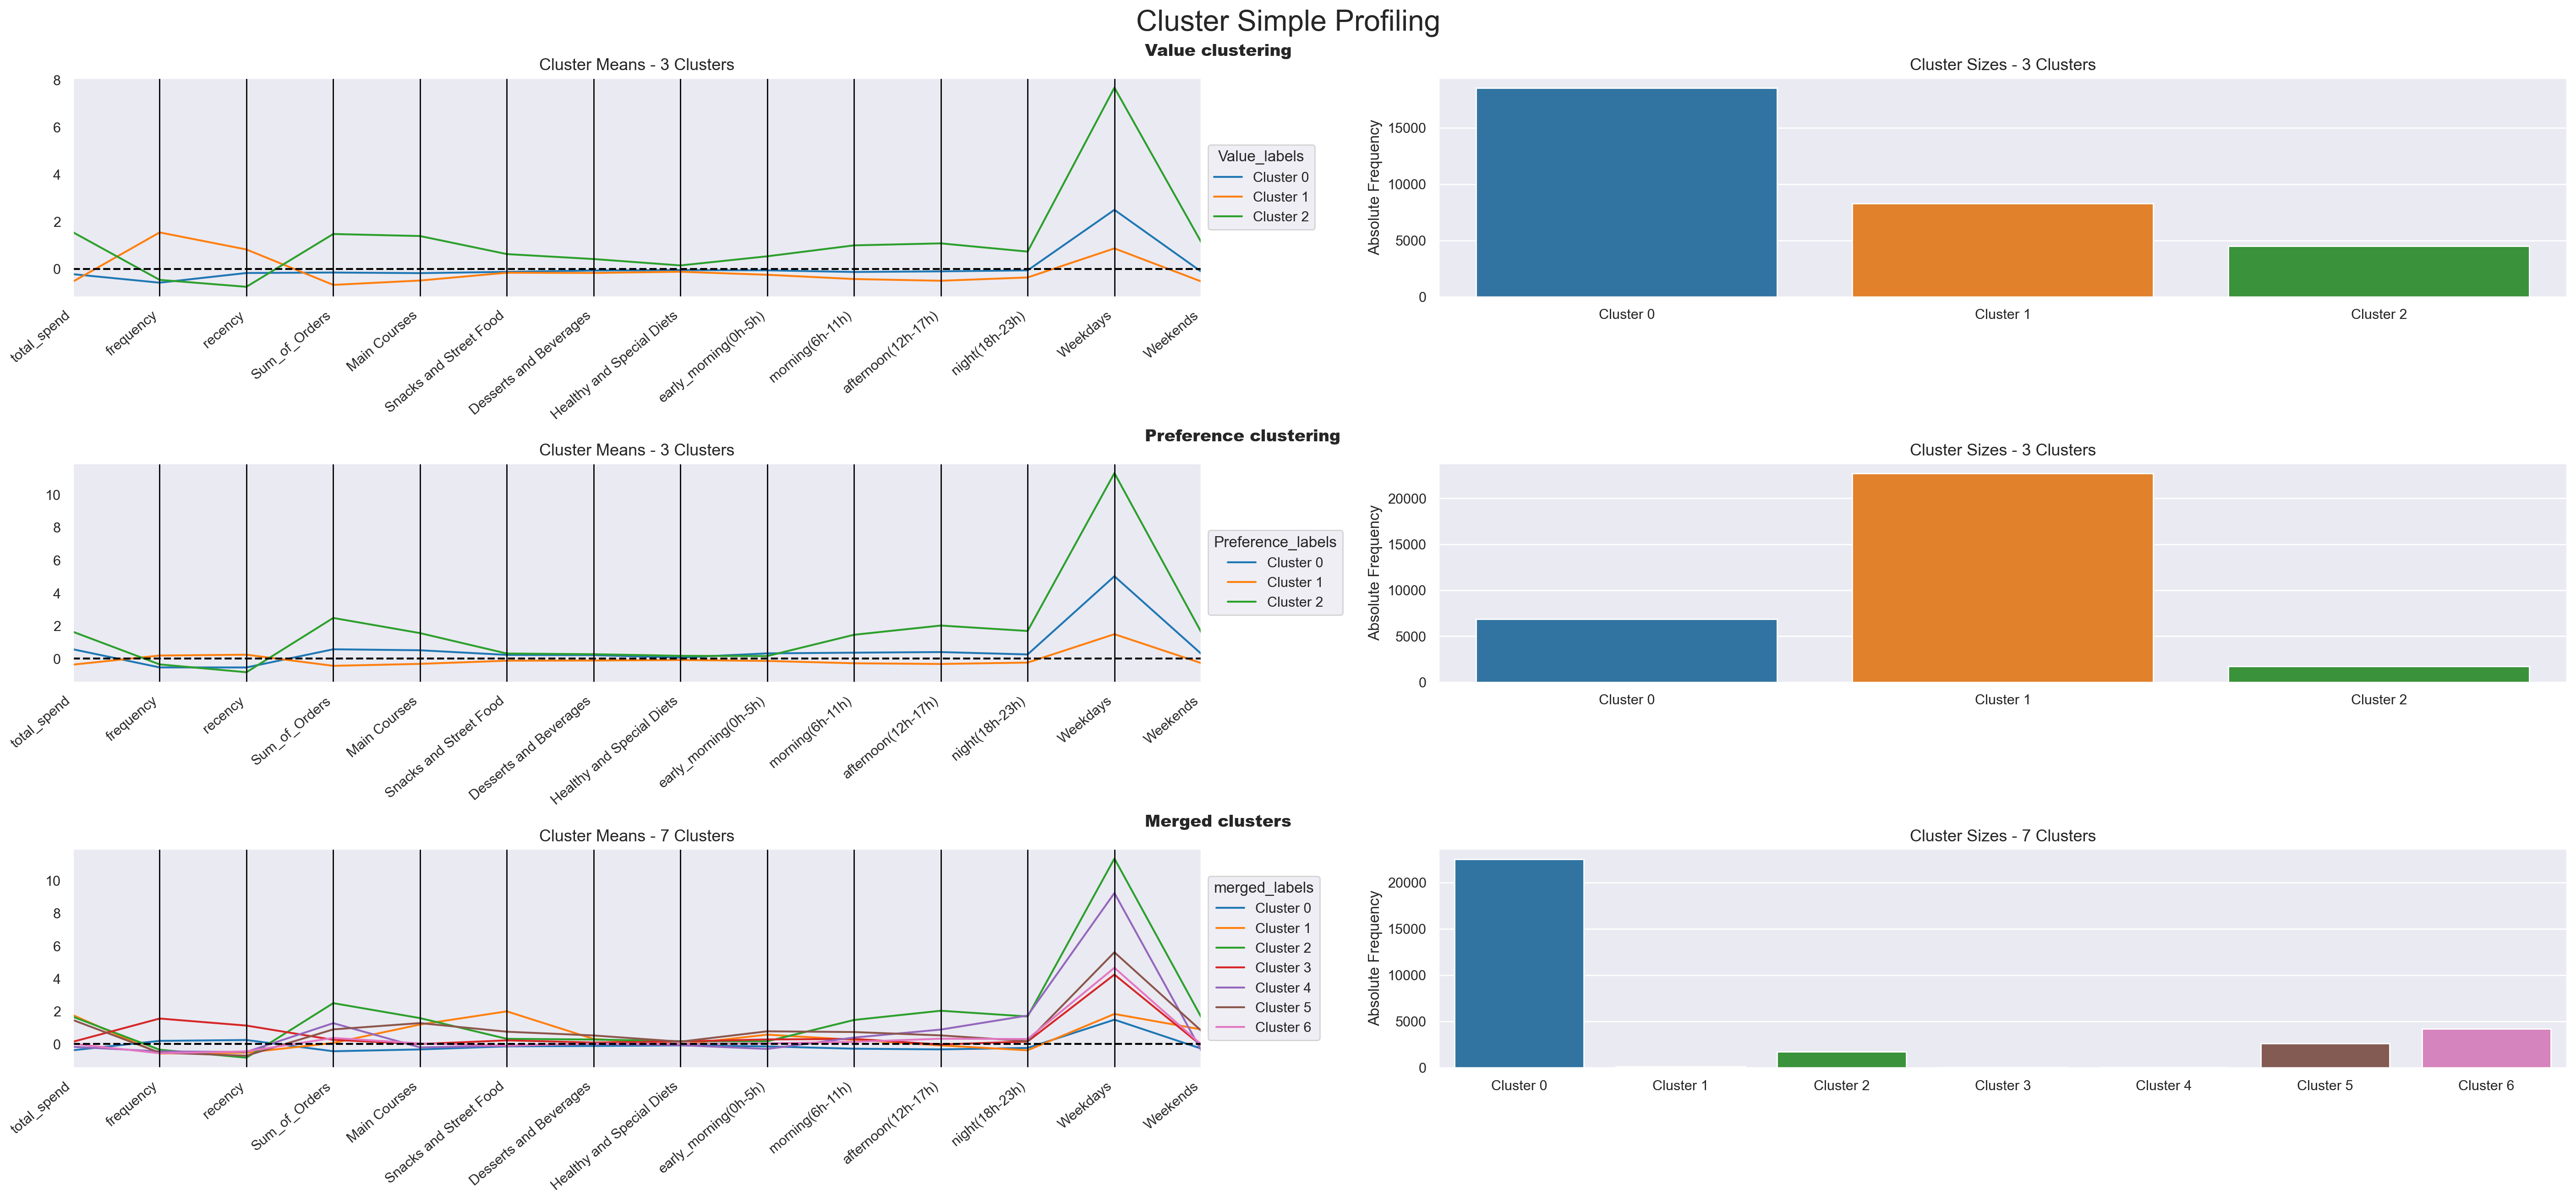

In [235]:
# Profilling each cluster 
cluster_profiles(
    df = df[metrics + ['Value_labels', 'Preference_labels', 'merged_labels']], 
    label_columns = ['Value_labels', 'Preference_labels', 'merged_labels'], 
    figsize = (28, 13), 
    compare_titles = ["Value clustering", "Preference clustering", "Merged clusters"]
)

## Profiling with unused / categorical features

In [236]:
non_metric_features

['enc_payment_method_CARD',
 'enc_payment_method_CASH',
 'enc_payment_method_DIGI',
 'enc_is_chain_0',
 'enc_is_chain_1',
 'enc_customer_city_2',
 'enc_customer_city_4',
 'enc_customer_city_8',
 'enc_age_group',
 'enc_last_promo']

* City

In [237]:
df_city = df[['merged_labels',
            'enc_customer_city_2',
            'enc_customer_city_4',
            'enc_customer_city_8']].groupby(['merged_labels']).sum()

df_city

,enc_customer_city_2,enc_customer_city_4,enc_customer_city_8
merged_labels,,,
0,7235.0,7298.0,7987.0
1,1.0,22.0,134.0
2,851.0,657.0,211.0
3,19.0,13.0,16.0
4,28.0,1.0,0.0
5,415.0,860.0,1341.0
6,2025.0,1365.0,808.0


In [238]:
df[['merged_labels']].groupby(['merged_labels']).value_counts()

merged_labels
0    22520
1      157
2     1719
3       48
4       29
5     2616
6     4198
Name: count, dtype: int64

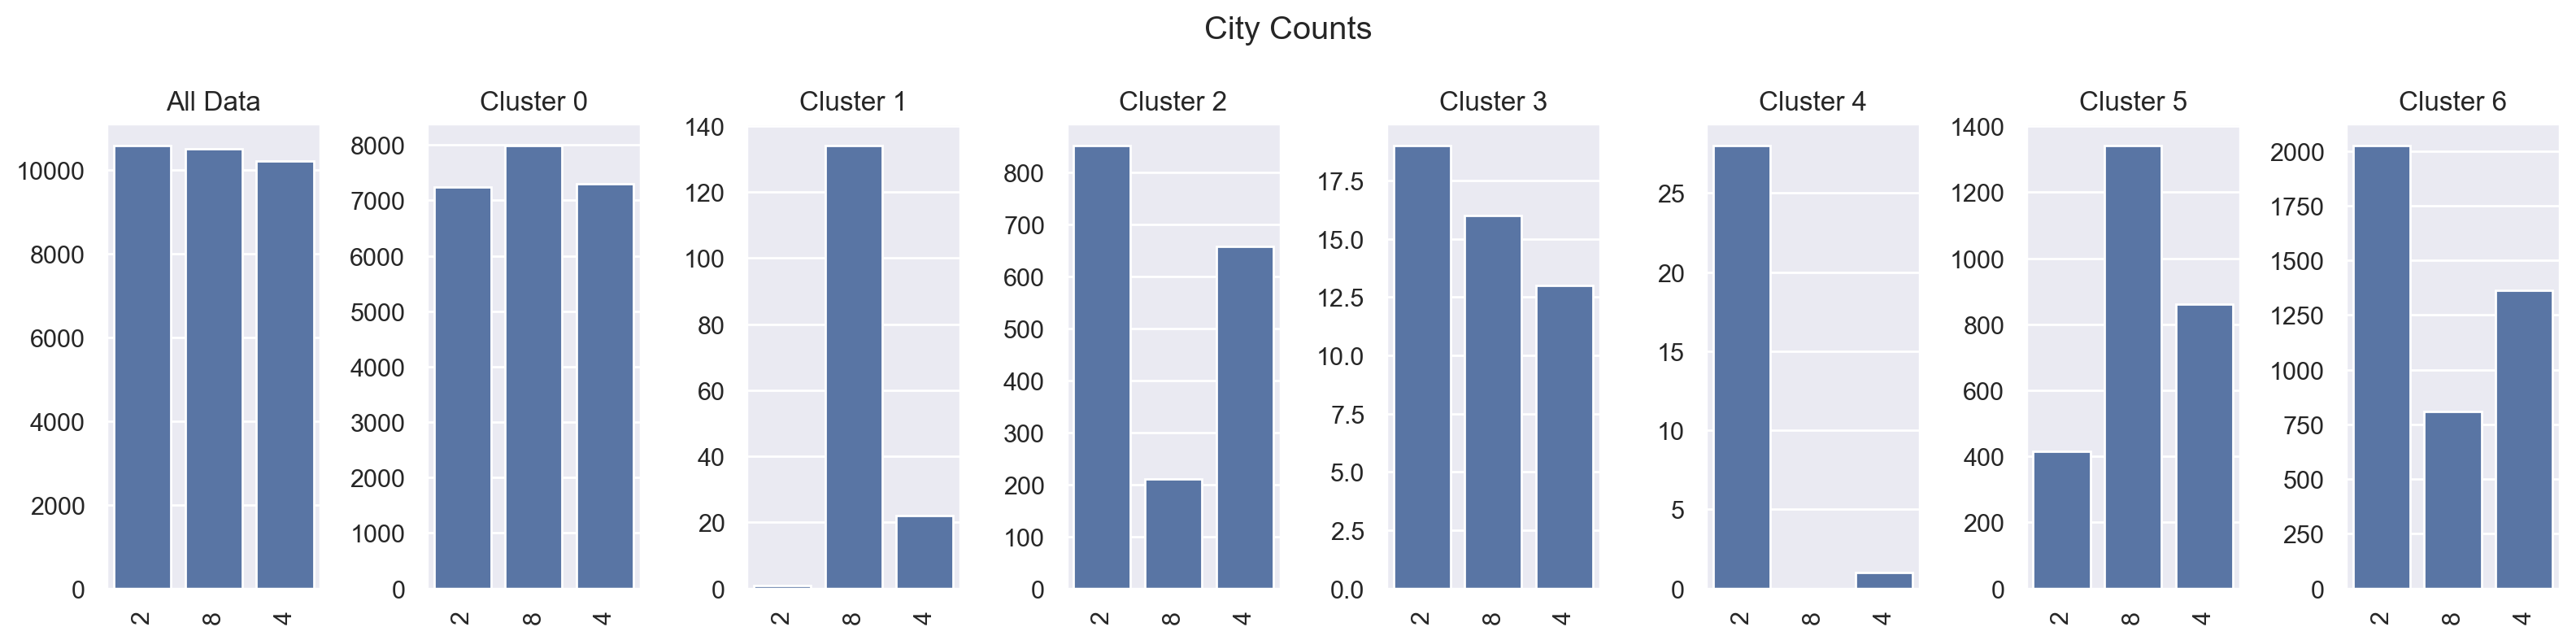

In [240]:
fig, axes = plt.subplots(1, 
                         df['merged_labels'].nunique() + 1, # Add an extra ax for population countplot
                         figsize=(16,4),
                         tight_layout=True,
                        #  sharey=True,
                         )


for i in range(len(axes.flatten())): 
    ax = axes[i]
    if i == 0:
        sns.countplot(df, 
                        x='customer_city', 
                        order = df['customer_city'].value_counts().index,
                        ax=ax)
        ax.set_title("All Data")
        
    else:    
        sns.countplot(df.loc[df['merged_labels']==i-1], 
                    x='customer_city', 
                    order = df['customer_city'].value_counts().index,
                    ax=ax)
        ax.set_title("Cluster {}".format(i-1))
    
    ax.tick_params(axis="x", labelrotation=90)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.suptitle("City Counts", )
plt.show()

<Axes: xlabel='merged_labels'>

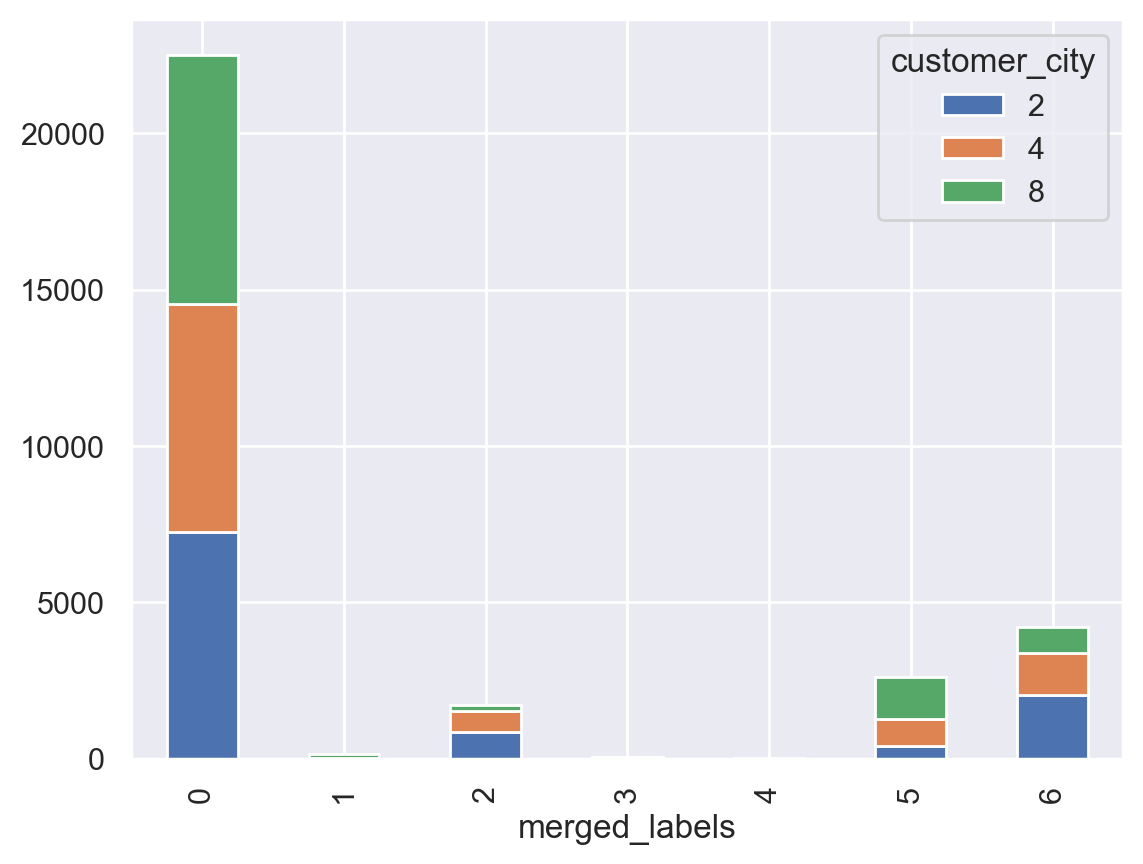

In [241]:
df_cl_city = df.groupby([
    "merged_labels", 
    "customer_city",
    ])['customer_city'].size().unstack()

df_cl_city


df_cl_city.plot.bar(stacked=True)